In [1]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Desktop/SLR-to-BI-4750`


In [2]:
using Random # random number generation
using Distributions # probability distributions and interface
using Statistics # basic statistical functions, including mean
using Plots # plotting
using DataFrames
# using Measures
# using MarkdownTables
using XLSX
using CSV
using Dates
using StatsModels
using GLM

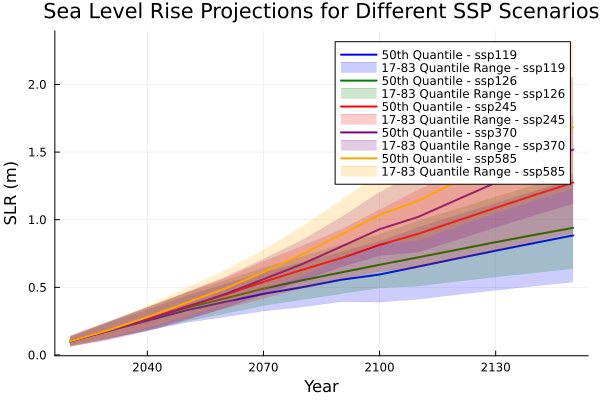

In [3]:
# get slr data
slr = DataFrame(XLSX.readtable("data/ipcc_ar6_sea_level_projection_psmsl_id_12.xlsx", "Total"))

# years range
years = 2020:10:2150

# unique scenarios
scenarios = ["ssp119", "ssp126", "ssp245", "ssp370", "ssp585"]

colors = [:blue, :green, :red, :purple, :orange]

# plotting
p = plot(xlabel="Year", ylabel="SLR (m)", title="Sea Level Rise Projections for Different SSP Scenarios")

# Loop through each scenario and plot the data
for (i, scenario) in enumerate(scenarios)
    # Filter data for 17th, 50th, and 83rd quantiles for the current scenario
    data_25 = filter(row -> row.scenario == scenario && row.quantile == 17, slr)
    data_50 = filter(row -> row.scenario == scenario && row.quantile == 50, slr)
    data_75 = filter(row -> row.scenario == scenario && row.quantile == 83, slr)

    # Extract the sea level data for the 17th, 50th, and 83rd quantiles
    sea_levels_25 = Vector{Float64}(data_25[1, Symbol.(string.(years))])
    sea_levels_50 = Vector{Float64}(data_50[1, Symbol.(string.(years))])
    sea_levels_75 = Vector{Float64}(data_75[1, Symbol.(string.(years))])

    # Plot the 50th quantile
    plot!(p, years, sea_levels_50, label="50th Quantile - $scenario", color=colors[i], lw=2)

    # Plot the shaded area between the 17th and 83rd quantiles
    plot!(p, years, sea_levels_25, fillrange=sea_levels_75, label="17-83 Quantile Range - $scenario", color=colors[i], lw=0, fillalpha=0.2)
end

# Display the plot
display(p)
